In [1]:
import sys

In [2]:
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [3]:
import numpy
numpy.__version__

'1.21.5'

In [4]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [6]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
dataset=pandas.read_csv("Iris.csv")

In [8]:
print(dataset.shape)

(150, 5)


In [9]:
print(dataset.head(30))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [10]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [11]:
print(dataset.groupby("Species"))

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='P

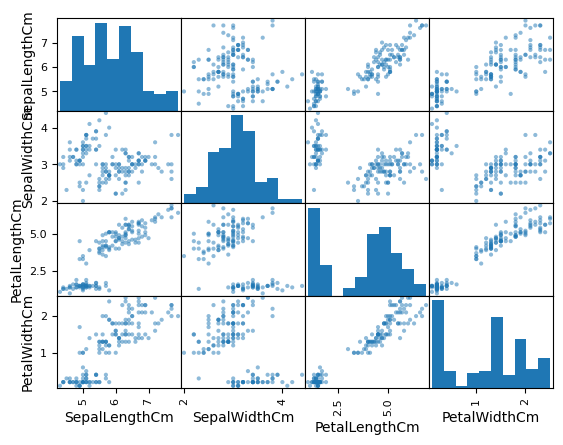

In [12]:
scatter_matrix(dataset)

In [13]:
array=dataset.values

In [14]:
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)

In [15]:
seed=6
scoring="accuracy"

In [16]:
# spot check algorithm
models=[]


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [18]:
df= pd.read_csv("tested.csv")

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
print("no. of passengers in orginal data : {}". format(len(df.index)))

no. of passengers in orginal data : 418


<AxesSubplot:xlabel='Survived', ylabel='count'>

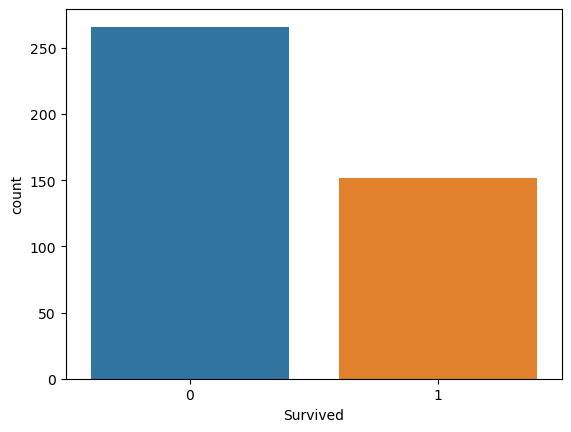

In [21]:
sns.countplot(x = 'Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

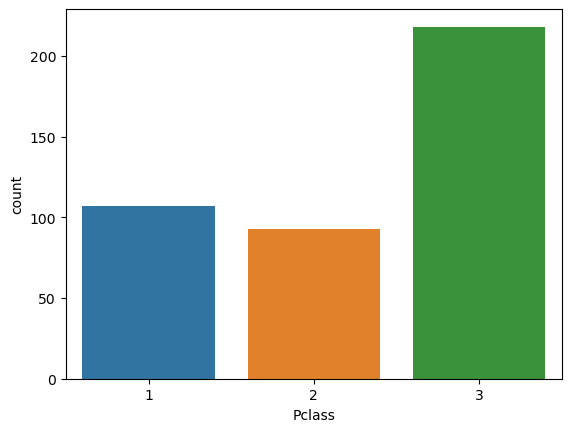

In [22]:
sns.countplot(x = 'Pclass', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

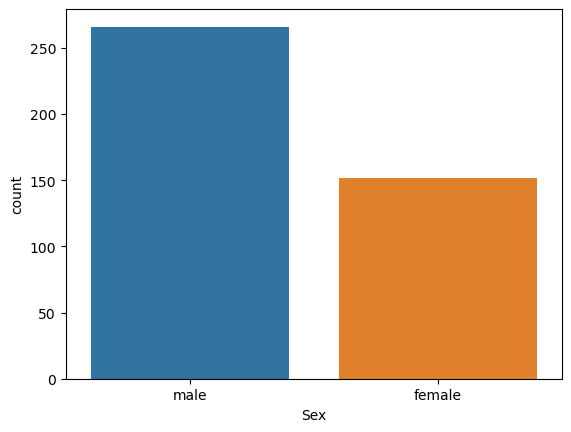

In [23]:
sns.countplot(x = 'Sex', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

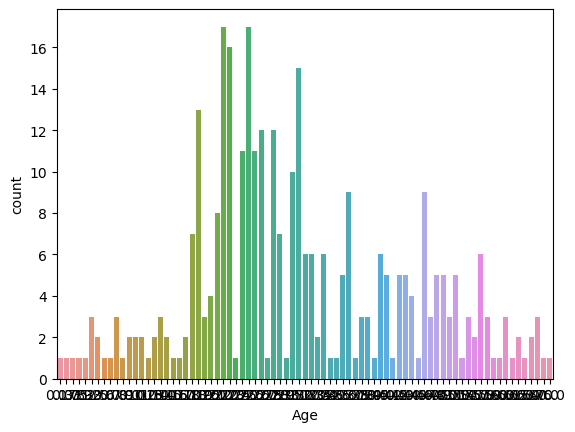

In [24]:
sns.countplot(x = 'Age', data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

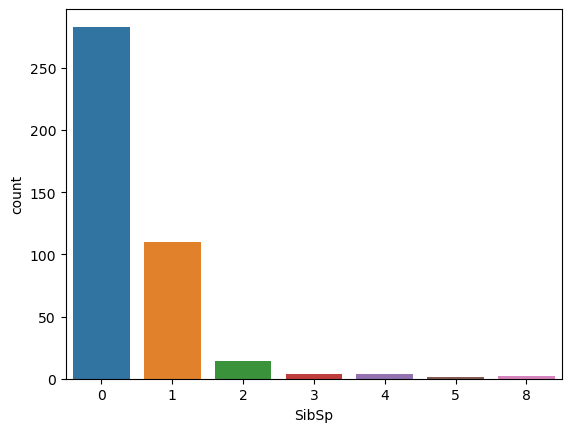

In [25]:
sns.countplot(x = 'SibSp', data = df)

In [26]:
count_survived = df["Survived"].value_counts()
count_survived

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

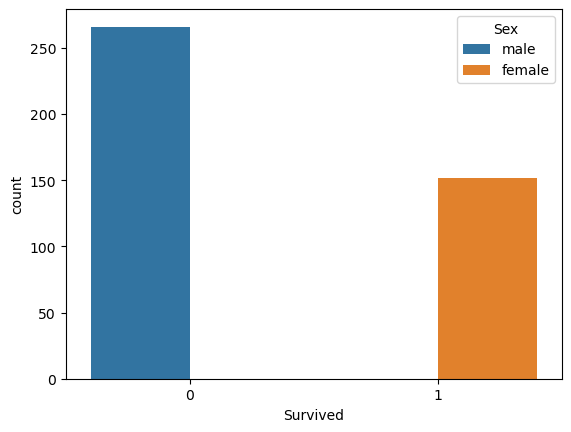

In [27]:
# To know who survived - males and females
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

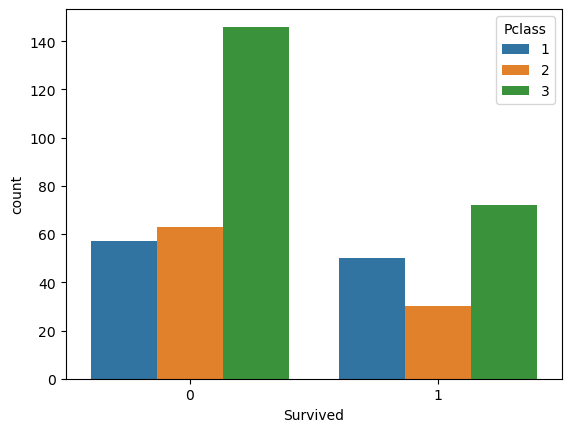

In [28]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

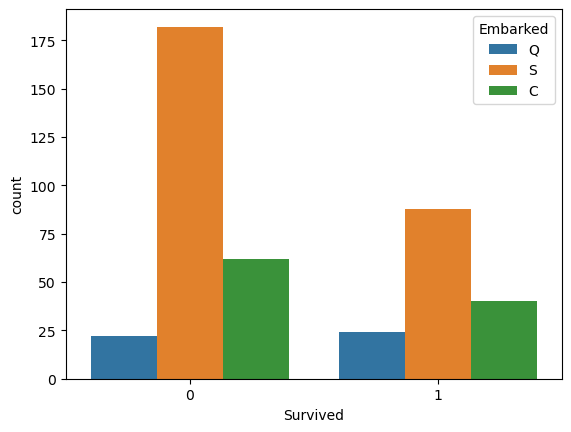

In [29]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = df)

<AxesSubplot:ylabel='Frequency'>

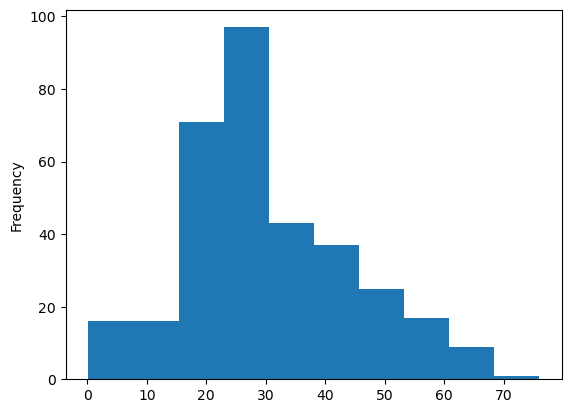

In [30]:
#Age Distribution

df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

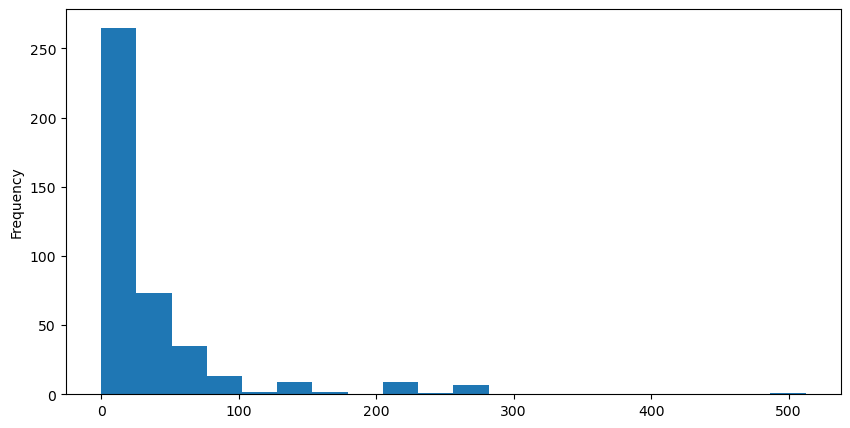

In [31]:
df["Fare"].plot.hist(bins = 20 , figsize=(10,5))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

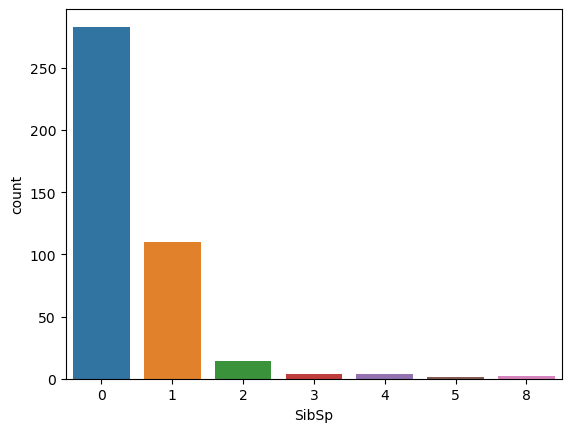

In [33]:
sns.countplot(x = 'SibSp', data = df)

In [34]:
#Data Wranglling

In [35]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [36]:
# Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

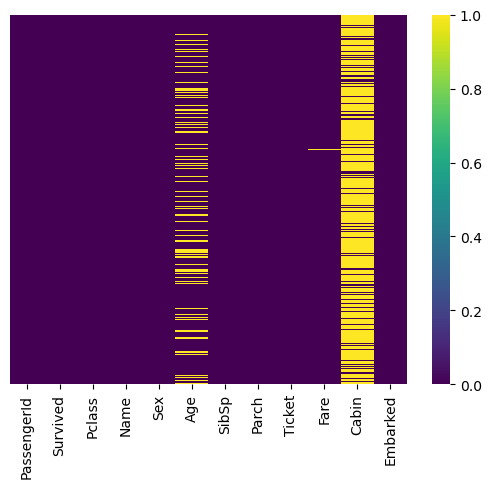

In [37]:
sns.heatmap(df.isnull(), yticklabels= False ,cmap='viridis' )

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

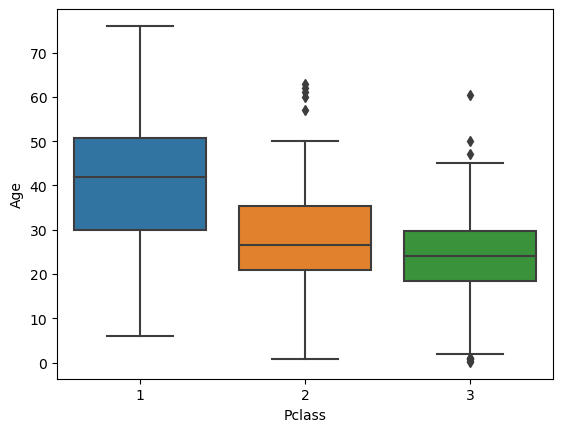

In [38]:
# checking for outliers
sns.boxplot(x ="Pclass", y="Age",data = df)

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

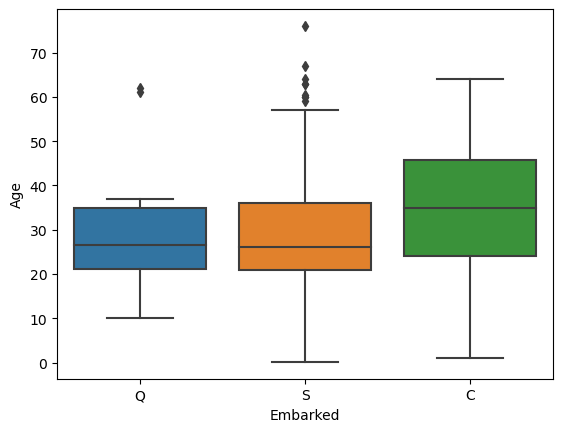

In [39]:
# checking for outliers
sns.boxplot(x ="Embarked", y="Age",data = df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

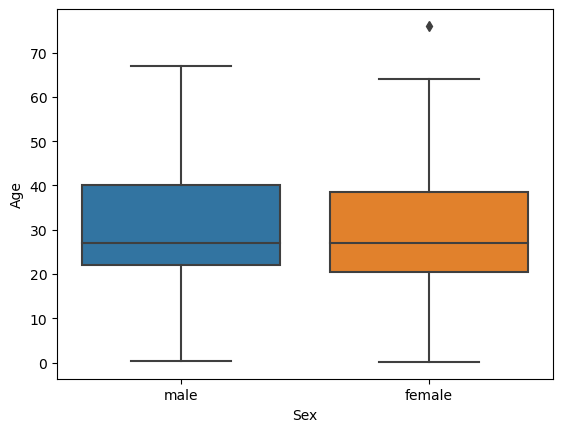

In [40]:
# checking for outliers
sns.boxplot(x ="Sex", y="Age",data = df)

In [41]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [43]:
df.drop("Cabin",axis=1,inplace=True)

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [45]:
df.dropna(inplace=True)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

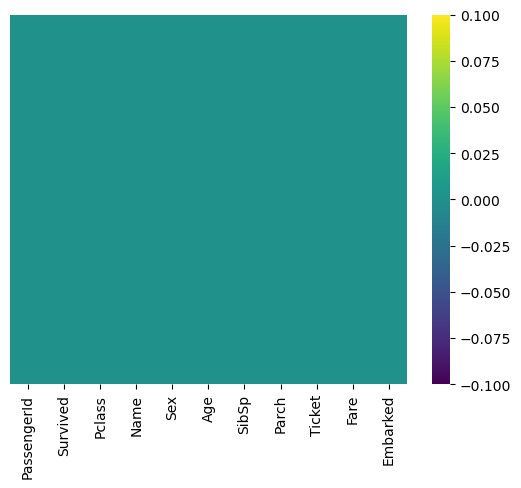

In [48]:
sns.heatmap(df.isnull(), yticklabels= False ,cmap='viridis' )

In [49]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
409,0
411,0
412,0
414,0


In [50]:
Embark=pd.get_dummies(df["Embarked"],drop_first=True)
Embark

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
409,0,1
411,1,0
412,0,1
414,0,0


In [51]:
Pclass=pd.get_dummies(df["Pclass"],drop_first=True)
Pclass

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
409,0,1
411,0,0
412,0,1
414,0,0


In [52]:
titanic_data=pd.concat([df,Sex,Embark,Pclass],axis=1)

In [53]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,0,0,1,0,1
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,0,1,0,0,0
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0,0,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,0


In [54]:
titanic_data.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [55]:
titanic_data.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,34.5,0,0,7.8292,1,1,0,0,1
1,1,3,47.0,1,0,7.0000,0,0,1,0,1
2,0,2,62.0,0,0,9.6875,1,1,0,1,0
3,0,3,27.0,0,0,8.6625,1,0,1,0,1


In [56]:
titanic_data.drop("Pclass",axis=1,inplace=True)

In [57]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1


In [58]:
X=titanic_data.iloc[:,1:]
y=titanic_data.iloc[:,0]


In [59]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [60]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,13.7750,0,0,1,0,1
411,37.0,1,0,90.0000,0,1,0,0,0
412,28.0,0,0,7.7750,0,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0


In [61]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel=LogisticRegression()

In [66]:
logmodel.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction=logmodel.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [68]:
from sklearn.metrics import classification_report

In [69]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        72\n           1       1.00      1.00      1.00        38\n\n    accuracy                           1.00       110\n   macro avg       1.00      1.00      1.00       110\nweighted avg       1.00      1.00      1.00       110\n'

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,prediction)

array([[72,  0],
       [ 0, 38]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,prediction)

1.0

In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [75]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,13.7750,0,0,1,0,1
411,37.0,1,0,90.0000,0,1,0,0,0
412,28.0,0,0,7.7750,0,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0


In [76]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [77]:

clf = clf.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[Text(0.5, 0.75, 'X[4] <= 0.5\ngini = 0.481\nsamples = 221\nvalue = [132, 89]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 89\nvalue = [0, 89]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 132\nvalue = [132, 0]')]

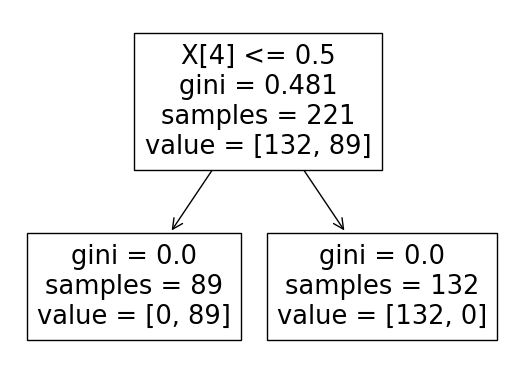

In [78]:
tree.plot_tree(clf)